# OSESM 3d homework assignment
Energy system model & scenarios

Look at the renewable-expansion pathway of the NetZero2040 Scenario Explorer at https://data.ece.iiasa.ac.at/netzero2040.

Prepare a Jupyter notebook that includes the following
- your own name and other relevant information about yourself, this assignment
- a short overview of the source data and task: project, citation, indicators
- three figures showing relevant insights that you derived from the data
- sufficient text to explain "story" of your figures
- ideas for more in-depth analysis of the indicators or new features of the package(s) used for this assignment

The pyam package may be useful for this assignment (but it is not mandatory).
Visit https://pyam-iamc.readthedocs.io for more information.
Note that the package is distributed on pypi.org as `pyam-iamc`, so you have to install it as


## Information
Mario Ernst
51831641@student.tuwien.ac.at
renewable-expension pathway

## Data model and task
The pyam data model (https://pyam-iamc.readthedocs.io/en/stable/data.html#) provides a structured framework for organizing and analyzing energy scenario data, particularly in the context of integrated assessment models (IAMs) and energy system models.
The data is structured by model, scenario, region, variable, unit and a temporal domain (year).

This jupyter notebook provides three figures for comparing renewable-expansion pathways of different Scenarios of the NetZero2040 Scenario Explorer. The figures compare wind, solar, and total renewable generation (including wind, PV, hydro pumped storage, hydro reservoir, run of river, geothermal and biomass) towards the variables capacity and secondary energy (only for wind) for the region of Austria.

The models and scenarios differ in the following indicators: greenhouse gas emissions, renewable energy capacity, energy production and consumption, investments and costs, technological deployment and policy and regulatory. This analysis takes capacity and energy prodcution (secondary energy) as main indicators for comparison.

From the existing 11 models and 30 scenarios the following models and scenarios are used due to data availability of capacity and generation:
-  ATLANTIS 3.0.6
    -  Ambitious Scenario (AS)
    -  Cost optimal Ambitious Scenario (oAS)
-  Erneuerbaren-Ausbau-Gesetz 2021
    -  Expansion Target
- Medea v1.0
    -  NetZero2040-low-import/high-demand scenario(different wind subscenarios with target year 2040)
- TIMES Austria v1.0 are used.
    -  Netzero2040 (all scenarios have the same renewable pathways)


## Data source
The contributing autors and developers for the used pyam package are available at https://pyam-iamc.readthedocs.io/en/stable/authors.html
Data is downloaded via the pyam api


#### ATLANTIS 3.0.6
The ATLANTIS model (https://www.tugraz.at/modelle/atlantis), developed by Graz University of Technology, simulates the European electricity sector, including power plants, the grid, and financials of electricity companies, from 2006 to 2050. It analyzes regional electricity prices, infrastructure needs, renewable energy integration, and regulatory impacts, providing insights for sustainable energy development through detailed scenario analyses and data evaluation.


#### Erneuerbaren-Ausbau-Gesetz 2021
The Erneuerbaren-Ausbau-Gesetz 2021 aims to establish legally binding targets for greenhouse gas emission reductions in line with the European Union's climate goals. It outlines sector-specific emission reduction pathways, enhanced monitoring and reporting mechanisms, and the introduction of a climate protection committee to ensure compliance and accountability.


#### MEDEA
Modelling the Energy Development under Environmental And Socioeconomic constraints (https://medeas.eu/) is a research project that foruses on developing models to assess the transition to a low-carbon energy system in Erope with focus on the complex interactions between energy, economy, society and environment.


#### TIMES Austria v1.0
The Integrated MARKAL-EFOM System (https://iea-etsap.org/index.php/etsap-tools/model-generators/times) is a energy modeling framework developed as part of the International Energy Agency's Energy Technology Systems Analysis Program (IEA-ETSAP). It is designed to facilitate the analysis of energy systems and their interactions with the economy and environment. The model allows exploring different technological pathways and policy scenarios to meet future energy needs sustainably and at the lowest possible cost.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyam
from pyam import IamDataFrame

## Figures

In [2]:
# collect relevant models and scenarios
conn = pyam.iiasa.Connection('netzero2040')

[INFO] 17:40:47 - ixmp4.conf.auth: Connecting to service anonymously and without credentials.
[INFO] 17:40:48 - pyam.iiasa: You are connected to the IXSE_NETZERO2040 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/netzero2040/#/about
[INFO] 17:40:48 - pyam.iiasa: You are connected as an anonymous user


In [3]:
models = conn.models()
scenarios = conn.scenarios()
variables = conn.variables()

In [4]:
# download data
df_import = pyam.lazy_read_iiasa(
    file="netzero2040.csv",
    name='netzero2040',
    # model="MESSAGEix*",
    # variable=["Capacity", "Secondary Energy"],
    # region="World",
)

[INFO] 17:40:48 - pyam.iiasa: You are connected to the IXSE_NETZERO2040 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/netzero2040/#/about
[INFO] 17:40:48 - pyam.iiasa: You are connected as an anonymous user
[INFO] 17:40:49 - pyam.core: Reading file netzero2040.csv
C:\Users\ernstmar\dev\OSESM_assignment_1\venv\Lib\site-packages\pyam\utils.py:318: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(dropna=True)
[INFO] 17:40:49 - pyam.iiasa: Database read from file


In [5]:
df = IamDataFrame(df_import)
df = df.convert_unit("TJ", to="TWh")
df = df.convert_unit('MW', to='GW')

In [6]:
# Visualize table in wide IAMC data format ['model', 'scenario', 'region', 'variable', 'unit'] and as timeseries() (i.e. grouping) and perform unit conversion to GW (capacity) and TWh (secondary energy)
idx_col = pyam.IAMC_IDX
print(f'Columns (dimensions) of the IAMC data format: {idx_col}')

Columns (dimensions) of the IAMC data format: ['model', 'scenario', 'region', 'variable', 'unit']


### Wind
query data, remove duplicated scenarios, create figure

In [7]:
# get wind power and energy data
df_wind_P = df.filter(variable='Capacity|Power Plant|Electricity|Wind').timeseries().reset_index()
df_wind_E = df.filter(variable='Secondary Energy|Electricity|Wind').timeseries().reset_index()
# df_wind_P

In [8]:
# change column order because 2035 would be last
column_order = ['model', 'scenario', 'region', 'variable', 'unit',
                2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025,
                2026, 2027, 2028, 2029, 2030, 2035, 2040]
df_wind_P = df_wind_P[column_order]
df_wind_E = df_wind_E[column_order]

In [9]:
value_columns = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028,
                 2029, 2030, 2035, 2040]  # value columns for further usage and filtering
# remove scenarios with duplicated values
duplicates_ = df_wind_P[df_wind_P.duplicated(subset=value_columns, keep=False)]
print('grouping by value columns did not work. therefore a manual selection is done')
# duplicates
selected_duplicates_ = duplicates_.loc[[0, 6, 17], :]
print(f'the following models and scenarios are selected out of the duplicated wind expansion pathways: {selected_duplicates_[["model", "scenario"]]}')
df_wind_P.drop(duplicates_.drop(selected_duplicates_.index, axis='index').index, axis='index', inplace=True)

grouping by value columns did not work. therefore a manual selection is done
the following models and scenarios are selected out of the duplicated wind expansion pathways:                  model                               scenario
0       ATLANTIS 3.0.6                Ambitious Scenario (AS)
6       ATLANTIS 3.0.6  Cost optimal Ambitious Scenario (oAS)
17  TIMES Austria v1.0    NetZero2040 high-import/high-demand


In [10]:
value_columns = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028,
                 2029, 2030, 2035, 2040]
duplicates_ = df_wind_E[df_wind_E.duplicated(subset=value_columns, keep=False)]
print('Grouping by value columns did not work. Therefore a manual selection is done.')
# duplicates_
selected_duplicates_ = duplicates_.loc[[6, 17], :]
print(f'The following models and scenarios are selected out of the duplicated wind expansion pathways: {selected_duplicates_[["model", "scenario"]]}')
df_wind_E.drop(duplicates_.drop(selected_duplicates_.index, axis='index').index, axis='index', inplace=True)
df_wind_E

Grouping by value columns did not work. Therefore a manual selection is done.
The following models and scenarios are selected out of the duplicated wind expansion pathways:                  model                               scenario
6       ATLANTIS 3.0.6  Cost optimal Ambitious Scenario (oAS)
17  TIMES Austria v1.0    NetZero2040 high-import/high-demand


,model,scenario,region,variable,unit,2017,2018,2019,2020,2021,...,2023,2024,2025,2026,2027,2028,2029,2030,2035,2040
0,ATLANTIS 3.0.6,Ambitious Scenario (AS),Austria,Secondary Energy|Electricity|Wind,TWh,7.180303,7.441802,7.674563,7.74256,8.761640,...,10.956401,11.988183,12.889185,13.967198,14.766386,15.955244,16.899534,17.767991,NaN,NaN
1,ATLANTIS 3.0.6,Ambitious Scenario - Sensitivity Analysis CO2 ...,Austria,Secondary Energy|Electricity|Wind,TWh,7.180303,7.441802,7.674563,7.74256,8.760027,...,10.992907,11.905998,12.893934,13.907371,14.867012,15.692777,16.782228,17.858885,NaN,NaN
2,ATLANTIS 3.0.6,Ambitious Scenario - Sensitivity Analysis CO2 ...,Austria,Secondary Energy|Electricity|Wind,TWh,7.180303,7.441802,7.674563,7.74256,8.759843,...,10.990342,11.988415,12.900102,13.876841,14.664110,15.626896,16.682050,17.812114,NaN,NaN
3,ATLANTIS 3.0.6,Ambitious Scenario - Sensitivity Analysis Gas ...,Austria,Secondary Energy|Electricity|Wind,TWh,7.180303,7.441802,7.674563,7.74256,8.761640,...,10.815467,11.770071,12.860102,13.953556,14.803436,15.984033,16.955787,17.972575,NaN,NaN
4,ATLANTIS 3.0.6,Ambitious Scenario - Sensitivity Analysis Gas ...,Austria,Secondary Energy|Electricity|Wind,TWh,7.180303,7.441802,7.674563,7.74256,8.762095,...,10.919875,11.723726,12.849520,13.876555,14.901990,15.956719,16.838437,17.920760,NaN,NaN
5,ATLANTIS 3.0.6,Conservative Scenario (CS),Austria,Secondary Energy|Electricity|Wind,TWh,7.180303,7.441802,7.674563,7.74256,8.761640,...,10.955827,11.988183,12.900667,13.947513,14.793770,15.948683,16.908971,17.806782,NaN,NaN
6,ATLANTIS 3.0.6,Cost optimal Ambitious Scenario (oAS),Austria,Secondary Energy|Electricity|Wind,TWh,7.180303,7.441802,7.674563,7.74256,10.291381,...,15.491720,18.087680,20.452664,23.038862,25.466090,28.149438,30.644807,33.154288,NaN,NaN
8,Erneuerbaren-Ausbau-Gesetz 2021,Expansion Target,Austria,Secondary Energy|Electricity|Wind,TWh,NaN,NaN,NaN,6.79200,6.740000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.792000,NaN,NaN
9,Medea v1.0,NetZero2040 low-import/high-demand [wind 0.0],Austria,Secondary Energy|Electricity|Wind,TWh,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.098315
10,Medea v1.0,NetZero2040 low-import/high-demand [wind 10.4],Austria,Secondary Energy|Electricity|Wind,TWh,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.143346


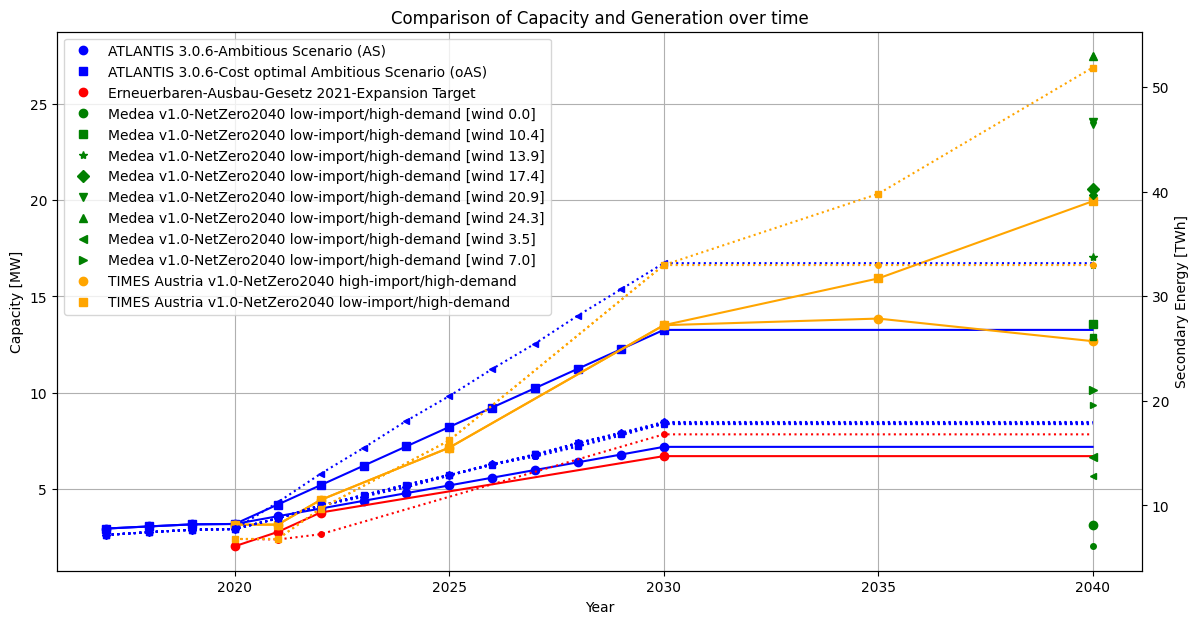

In [11]:
df1 = df_wind_P.copy()
df2 = df_wind_E.copy()

# Define color and marker maps for models and scenarios
colors = ['blue', 'red', 'green', 'orange', 'black']  # Colors for 4 models
markers = ['o', 's', '*', 'D', 'v', '^', '<', '>']  # Markers for 8 scenarios

# Unique models and scenarios
unique_models = df_wind_P['model'].unique()

# Create a mapping from model/scenario to color/marker
color_map = {model: colors[i] for i, model in enumerate(unique_models)}

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot df1 (MW) on ax1
for model in unique_models:
    models = df1['model'].unique()
    # print(f'model: {model}')
    fil_ = df1['model'] == model
    scenarios = df1.loc[fil_, 'scenario']
    marker_map = {scenario: markers[i] for i, scenario in enumerate(scenarios)}

    for scenario in scenarios:
        data_ = df1[(df1['model'] == model) & (df1['scenario'] == scenario)].copy()
        data_ = data_[value_columns]
        data_ = data_.melt()
        data_.set_index('variable', inplace=True)
        ax1.plot(data_.index, data_['value'],
                 label=f'{model}-{scenario}',
                 color=color_map[model],
                 marker=marker_map[scenario],
                 linestyle='')
        ax1.plot(data_.index, data_.interpolate()['value'],
                 label='_nolegend_',
                 color=color_map[model],
                 marker='',
                 markersize=10,
                 linestyle='-')

ax1.set_xlabel('Year')
ax1.set_ylabel('Capacity [MW]')
ax1.grid(True)

# Create a second y-axis for df2 (TJ)
ax2 = ax1.twinx()

# Plot df2 (TJ) on ax2
for model in unique_models:
    models = df2['model'].unique()
    # print(f'model: {model}')
    fil_ = df2['model'] == model
    scenarios = df2.loc[fil_, 'scenario']
    marker_map = {scenario: markers[i] for i, scenario in enumerate(scenarios)}
    for scenario in scenarios:
        data_ = df2[(df2['model'] == model) & (df2['scenario'] == scenario)].copy()
        data_ = data_[value_columns]
        data_ = data_.melt()
        data_.set_index('variable', inplace=True)
        ax2.plot(data_.index, data_['value'],
                 label=f'{model}-{scenario}',
                 color=color_map[model],
                 marker=marker_map[scenario],
                 markersize=4,
                 linestyle='')
        ax2.plot(data_.index, data_.interpolate()['value'],
                 label='_nolegend_',
                 color=color_map[model],
                 marker='',
                 linestyle=':')

ax2.set_ylabel('Secondary Energy [TWh]')

# Create a single legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
# ax1.legend(lines + lines2, labels + labels2, loc='upper left')
ax1.legend(lines, labels, loc='upper left')

# Show the plot
plt.title('Comparison of Capacity and Generation over time')
# plt.legend()
plt.show()

#### Analysis - wind figure
The figure shows the capacity and expected generation of secondary energy in form of electricity from wind power plants in Austria from different models and sceanrios. Capacity is plotted on the left (bigger marker size) and secondary energy is plotted on the right y-axis.
Comparability is only given between ATLANTIS 3.0.6, Erneuerbaren-Ausbau-Gesetz and TIMES Austria v1.0 models from 2020 to 2030 due to the timespan. The Medea v1.0 scenarios show the variety of wind capacity in 2040 in the NetZero2040 low-import/high-demand scenario.
The TIMES Austria v1.0 Model has 4 different scenarios, 3 of which are the same: high-import/high-demand, high-import/low-demand, low-import/low-demand. low-import/high-demand (gold and squares in the figure) differs from 2030 onwards due to higher generation where it reaches the Medea v1.0 wind [17.4] subscenario capacity, but with 30 % higher energy production in 2040.


#### Proposal for further analyses - wind figure
The full load hours can be derived from the ratio of capacity and generation. However, a multiplication of renewable generation with an unchanged market design will lead to distortions on the short-term electricity markets, which could already be observed in 2023 and 2024. This can lead to strongly negative electricity prices - and thus to economic incentives to switch off the plants. This would lead to a reduction in full load hours and therefore to a reduction of energy generation by (unfunded) wind power plants.
The differences of generation at the same capacity levels from different models suggest that there are different approaches to estimate the generation.

### Solar
The solar figure is intended to visualise the variability of the PV expansion scenarios and models. Missing data is interpolated linearly. Medea v1.0 is not taken into account due to the lack of data availability before 2040

In [12]:
df_solar_P = df.filter(variable='Capacity|Power Plant|Electricity|Solar').timeseries().reset_index()
# df_solar_E = df.filter(variable='Secondary Energy|Electricity|Solar').timeseries().reset_index()

In [13]:
value_columns = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028,
                 2029, 2030, 2035, 2040]
duplicates_ = df_solar_P[df_solar_P.duplicated(subset=value_columns, keep=False)]
selected_duplicates_ = duplicates_.loc[[0, 6, 17], :]
df_solar_P.drop(duplicates_.drop(selected_duplicates_.index, axis='index').index, axis='index', inplace=True)
medea_data = df_solar_P[df_solar_P['model']=='Medea v1.0']
df_solar_P.drop(medea_data.index, axis='index', inplace=True)
df_solar_P

,model,scenario,region,variable,unit,2017,2018,2019,2020,2021,...,2023,2024,2025,2026,2027,2028,2029,2030,2040,2035
0,ATLANTIS 3.0.6,Ambitious Scenario (AS),Austria,Capacity|Power Plant|Electricity|Solar,GW,1.260892,1.445889,1.691306,2.052881,3.152881,...,5.352881,6.452881,7.552881,8.652881,9.752881,10.852881,11.952881,13.052881,NaN,NaN
6,ATLANTIS 3.0.6,Cost optimal Ambitious Scenario (oAS),Austria,Capacity|Power Plant|Electricity|Solar,GW,1.260892,1.445889,1.691306,2.052881,2.266981,...,2.695181,2.909281,3.123381,3.337481,3.551581,3.765681,3.979781,4.193881,NaN,NaN
8,Erneuerbaren-Ausbau-Gesetz 2021,Expansion Target,Austria,Capacity|Power Plant|Electricity|Solar,GW,NaN,NaN,NaN,3.105000,3.294000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.043000,NaN,NaN
17,TIMES Austria v1.0,NetZero2040 high-import/high-demand,Austria,Capacity|Power Plant|Electricity|Solar,GW,NaN,NaN,NaN,2.043000,2.077333,...,NaN,NaN,2.512883,NaN,NaN,NaN,NaN,18.245867,17.493008,18.225658


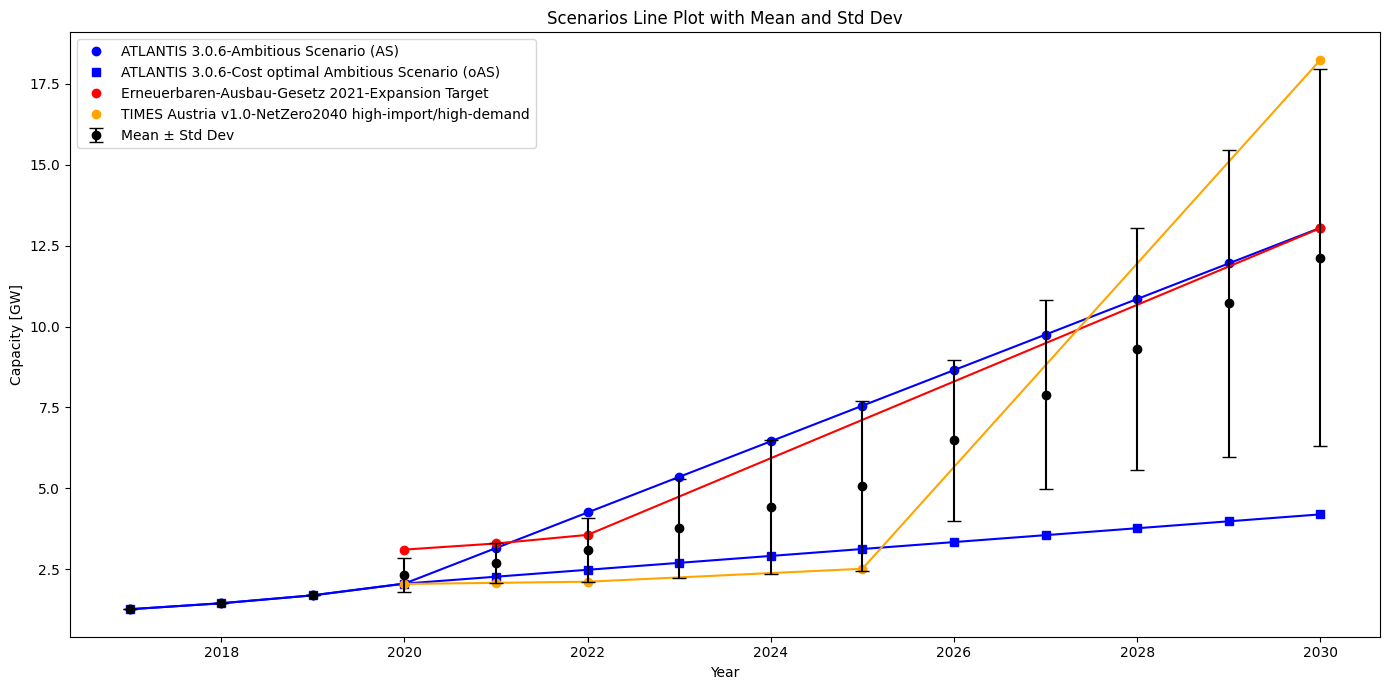

In [14]:
# Plot each scenario as a line plot
fig, ax = plt.subplots(figsize=(14, 7))

df1 = df_solar_P.copy()
df_solar_P_ts = pd.DataFrame(index=value_columns)

# Plot df1 (MW) on ax1
for model in unique_models:
    models = df1['model'].unique()
    # print(f'model: {model}')
    fil_ = df1['model'] == model
    scenarios = df1.loc[fil_, 'scenario']
    marker_map = {scenario: markers[i] for i, scenario in enumerate(scenarios)}

    for scenario in scenarios:
        data_ = df1[(df1['model'] == model) & (df1['scenario'] == scenario)].copy()
        data_ = data_[value_columns]
        data_ = data_.melt()
        data_.set_index('variable', inplace=True)
        data_ = data_[data_.index<=2030]
        ax.plot(data_.index, data_['value'],
                 label=f'{model}-{scenario}',
                 color=color_map[model],
                 marker=marker_map[scenario],
                 linestyle='')
        ax.plot(data_.index, data_.interpolate()['value'],
                 label='_nolegend_',
                 color=color_map[model],
                 marker='',
                 linestyle='-')

        # prepare a dataframe with models as column and years as index (timeseries)
        df_solar_P_ts.loc[:, f'{model}-{scenario}'] = data_

# Calculate mean and standard deviation for each year
mean_values = df_solar_P_ts.interpolate(axis=0).mean(axis=1)
std_values = df_solar_P_ts.interpolate(axis=0).std(axis=1)
#
# Overlay boxplot - manually adding error bars (mean ± std)
fil_ = df_solar_P_ts.index <= 2030
ax.errorbar(df_solar_P_ts.index[fil_],
            mean_values[fil_], yerr=std_values[fil_], fmt='o', color='black', label='Mean ± Std Dev', capsize=5)
#
# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Capacity [GW]')
ax.set_title('Scenarios Line Plot with Mean and Std Dev')
#
# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

#### Analysis - solar figure
The figure shows the scenario values and the mean and standard deviation of the solar capacity of different Models and sceanrios.
Comparability is only given between ATLANTIS 3.0.6, Erneuerbaren-Ausbau-Gesetz and TIMES Austria v1.0 models due to the timespan. Therefore the Medea v1.0 is not used this time.
The NetZero2040 Scenarios have the same capacity expansion and only negligible differences in generation. Therefore only the high-import/high-demand is used in this figure.
The Times model indicates an increase from 2.5 GW to 17.5 GW form 2025 to 2030. https://markttransparenz.apg.at/markt/Markttransparenz/erzeugung/installierte-leistung indicates an actual PV capacity in May 2024 of 6.3 GW which roughly corresponds to the Ambitious Scenario from the ATLANTIS model


#### Proposal for further analyses - solar figure
In contrast to wind generation, PV generation has fewer local influences and is primarily dependent on the time of day and year. Most generation therefore takes place everywhere at the same time. This influences electricity prices at these times and thus leads to a deterioration in economic efficiency. This reduces investment incentives and might influence the installation rates

### Renewables expanson pathway comparison
 Same models an scenarios from solar figure are used for this figure. However 4 suplots are created to visualize the aggregated renewable expansion pathway of this 4 scenarios.

In [15]:
# Function to create type name
def create_type_name(variable):
    parts = variable.split('|')
    type_name = ''
    if len(parts) >= 4:
        type_name = parts[3]
    if len(parts) >= 5:
        type_name += f" {parts[4]}"
    if len(parts) >= 6:
        type_name += f" {parts[5]}"
    return type_name

In [16]:
# try as_pandas() method and filter afterwards
# df_RE_pathway_all = df.as_pandas()
df_RE_pathway_all = df.timeseries().reset_index().copy()
new_cols = df.timeseries().reset_index()['variable'].str.split('|', expand=True)
new_cols.columns = ['type', 'plant', 'SE', 'PE', 'add1', 'add2']  # Rename the new columns
# df_RE_pathway_all = pd.concat([df_RE_pathway_all, new_cols], axis=1)

# prepare filter for valid combinations:
valid_models = df_solar_P.model.unique()
valid_scenarios = df_wind_P.scenario.unique()
valid_types = ['Capacity']
valid_plants = ['Power Plant', 'Electricity', 'Gas', 'Industry', 'Transport', 'Biogas',
                'Natural Gas', 'Other (Diversification)', 'Hydrogen', 'Hydro', 'Solar',
                'Bio-Methane', 'Biofuels', 'Biomass']
valid_SE = ['Electricity', 'Biomass', 'Hydro',
            'Solar', 'Wind', 'Biofuels', 'Hydrogen', 'Geothermal']
valid_PE = ['Biomass', 'Hydro', 'Solar', 'Wind', None, 'Pumped Storage',
            'Reservoir', 'Hydrogen', 'Biogas', 'Biofuels', 'Waste', 'Run of River', 'Geothermal',
            'Synfuel', 'Bus', 'Renewable Sources', 'Biogenic', 'Synthetic']
valid_add1 = [None, 'Pumped Storage',  'Reservoir', 'Biogenic', 'Hydrogen', 'Run of River',
              'Battery', 'Hydro',  'Biogas', 'Biofuels', 'Synthetic', 'Renewable Sources']
valid_add2 = [None, 'Pumped', 'Reservoir', 'Biogenic', 'Renewable Sources']

fil_ = (df_RE_pathway_all['model'].isin(valid_models)) & \
       (df_RE_pathway_all['scenario'].isin(valid_scenarios)) & \
       (new_cols['type'].isin(valid_types)) & (new_cols['plant'].isin(valid_plants)) & \
       (new_cols['SE'].isin(valid_SE)) & (new_cols['PE'].isin(valid_PE)) & \
       (new_cols['add1'].isin(valid_add1)) & (new_cols['add2'].isin(valid_add2))

df_RE_pathway = df_RE_pathway_all[fil_] # filterd dataframe with all relevant models and scenarios

In [17]:
df_RE_pathway.loc[:, 'type'] = df_RE_pathway['variable'].apply(create_type_name)  #apply function to create type name column
df_RE_pathway['model_scenario_type'] = df_RE_pathway['model']+ '_' + df_RE_pathway['scenario'] + '_' +  df_RE_pathway['type']
df_RE = df_RE_pathway[['model_scenario_type'] + value_columns]  # Select relevant columns and set index
df_melted = df_RE.melt(id_vars=['model_scenario_type'],
                       var_name='year',
                       value_name='MW')
# Pivot the dataframe to get model_scenario_type as columns
df_pivoted = df_melted.pivot(index='year', columns='model_scenario_type', values='MW')
# Reset the index to make year a column
df_pivoted.reset_index(inplace=True)
df_pivoted.set_index('year', inplace=True)
df_pivoted.index.name = 'year'
df_pivoted.interpolate(axis=0, inplace=True)


C:\Users\ernstmar\AppData\Local\Temp\ipykernel_6312\3958758885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RE_pathway.loc[:, 'type'] = df_RE_pathway['variable'].apply(create_type_name)  #apply function to create type name column
C:\Users\ernstmar\AppData\Local\Temp\ipykernel_6312\3958758885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RE_pathway['model_scenario_type'] = df_RE_pathway['model']+ '_' + df_RE_pathway['scenario'] + '_' +  df_RE_pathway['type']


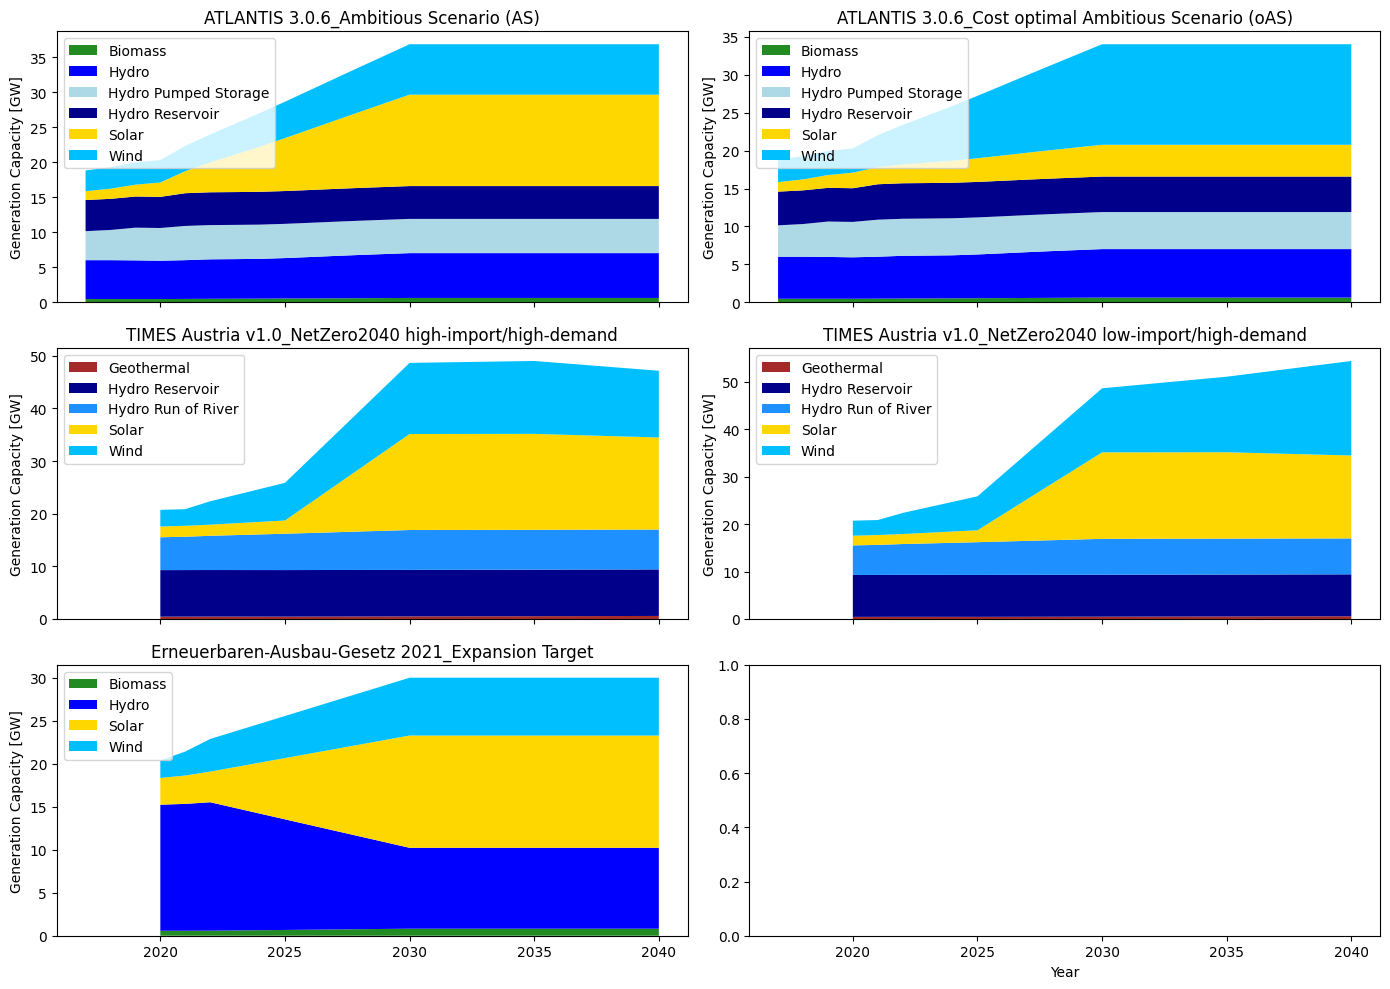

In [18]:
# Extract the year index
years = df_pivoted.index

# Extract the unique scenarios
scenarios = ['ATLANTIS 3.0.6_Ambitious Scenario (AS)',
             'ATLANTIS 3.0.6_Cost optimal Ambitious Scenario (oAS)',
             'TIMES Austria v1.0_NetZero2040 high-import/high-demand',
             'TIMES Austria v1.0_NetZero2040 low-import/high-demand',
             'Erneuerbaren-Ausbau-Gesetz 2021_Expansion Target',]

# Define colors for each energy type
colors = {
    'Biomass': 'forestgreen',
    'Hydro': 'blue',
    'Hydro Pumped Storage': 'lightblue',
    'Hydro Reservoir': 'darkblue',
    'Hydro Run of River': 'dodgerblue',
    'Liquids': 'orange',
    'Other': 'gray',
    'Solar': 'gold',
    'Wind': 'deepskyblue',
    'Geothermal': 'brown'
}

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 10), sharex=True)
axs = axs.flatten()  # Flatten the 2x2 array of axes for easy iteration

for i, scenario in enumerate(scenarios):
    ax = axs[i]
    scenario_cols = [col for col in df_pivoted.columns if scenario in col]

    # Data for stack plot
    data = df_pivoted[scenario_cols].transpose()

    # Extract labels and colors
    labels = [col.split('_')[-1] for col in scenario_cols]
    # print(labels)
    stack_colors = [colors[label] for label in labels]

    # Plot stack plot
    ax.stackplot(years, data, labels=labels, colors=stack_colors)
    ax.set_title(scenario)
    ax.legend(loc='upper left')
    ax.set_ylabel('Generation Capacity [GW]')

# Common x-label
plt.xlabel('Year')
plt.tight_layout()
plt.show()

#### Analysis - Renewable expansion pathway figure
The pathway of different renewable energy expansions models and scenarios and from Erneuerbaren-Ausbau-Gesetz 2021 is plotted in this figure. Although the models differ in timespan, energy source and expected demand of power, they share a increase in fluctuating generation of Wind and PV. The scenarios "Ambitious Scenario" and "Cost optimal Ambitious Scenario" of the ATLANTIS 3.0.6 model show that an increase in wind generation would be more cost effective. The


#### Proposal for further analyses - Renewable expansion pathway figure
In the figure above, generation power is plotted. One big of the shift of the energy system is the needed simultaneity of generation and demand. Assuming that Austria has a future maximum consumption of 10 or 15 GW after electrification, each of these scenarios has a multiple of the generation capacity. Depending on the time of day and the season, however, loads will have to be stored or shifted.
Although each energy source is important and necessary for the success of the energy transition, their share of the energy generated varies. The existing data sets could also be used to create a plot that visualises the different amounts of energy generated per energy source